In [3]:
import pandas as pd

In [5]:
response = pd.read_csv(r"E:\csv Files\Retail_Data_Response.csv")

In [7]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
transactions =  pd.read_csv(r"E:\csv Files\Retail_Data_Transactions.csv")

In [9]:
transactions

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [7]:
df = transactions.merge(response, on = 'customer_id',how = 'left')

In [8]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [9]:
print(df.dtypes)
print(df.shape)
df.head()

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object
(125000, 4)


,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [10]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [11]:
df.isnull().sum() #checking missing values

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [12]:
df = df.dropna() #removing rows with missing values

In [13]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [14]:
df['trans_date'] = pd.to_datetime(df['trans_date']) #change datatypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_1248\683831398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date']) #change datatypes


In [53]:
df
df.to_csv("cleaned_data.csv")

In [16]:
df['response'] = df['response'].astype('int64') #change datatypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_1248\1238644813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df['response'].astype('int64') #change datatypes


In [17]:
set(df['response'])

{0, 1}

In [18]:
from scipy import stats          #check for outliers

In [19]:
import numpy as np

In [20]:
z_score = np.abs(stats.zscore(df['tran_amount']))     #calculate z score

In [21]:
threshold = 3

In [22]:
outliers = z_score > threshold

In [23]:
set(outliers)         #No outliers

{False}

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

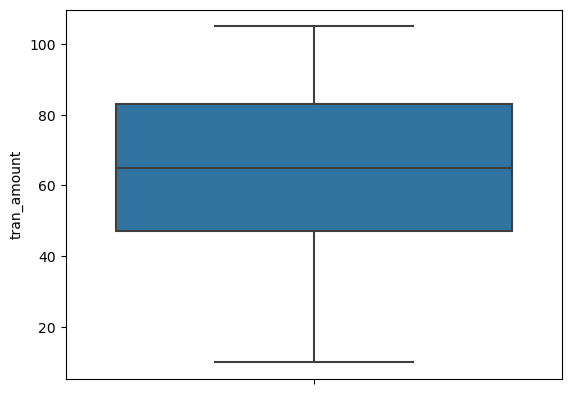

In [26]:
sns.boxplot(y=df.tran_amount)
plt.show()

In [27]:
df['month'] = df['trans_date'].dt.month

C:\Users\Admin\AppData\Local\Temp\ipykernel_1248\1675453229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


In [28]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
# check which 3 months have the highest transaction amount

In [29]:
monthly_sales = df.groupby('month')['tran_amount'].sum()

In [30]:
monthly_sales = monthly_sales.sort_values(ascending = False).reset_index()

<Axes: xlabel='month', ylabel='tran_amount'>

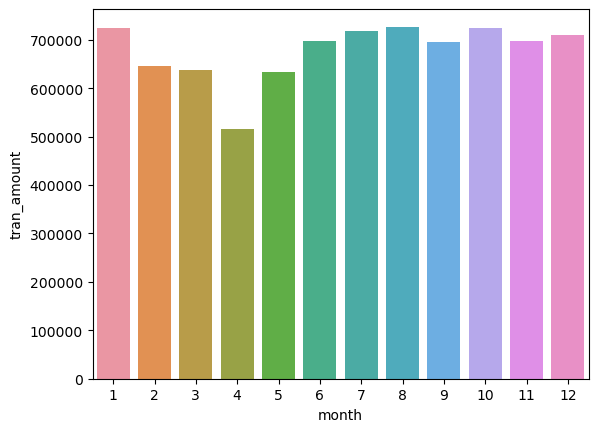

In [36]:
monthly_sales

monthly_sales.to_csv("monthly_sales.csv")
sns.barplot(x= 'month',y ='tran_amount',data=monthly_sales)

In [35]:
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [37]:
# customers having maximum number of transactions


customer = df.groupby('customer_id')['trans_date'].count()

In [38]:
customer = customer.sort_values(ascending = False).reset_index()

customer.columns = ['customer_id','count']

In [39]:
customer.head(10)

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
4,CS2620,35
5,CS3013,35
6,CS1215,35
7,CS5109,35
8,CS4998,34
9,CS4074,34


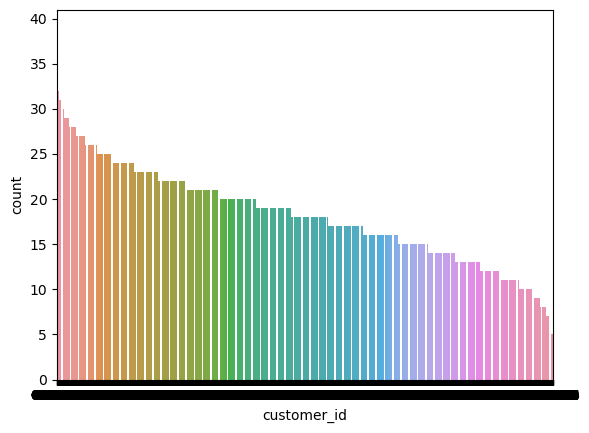

In [40]:
sns.barplot(x = 'customer_id', y = 'count',data = customer)
plt.show()

In [41]:
# Highest amount spent by customer


customer_amount = df.groupby('customer_id')['tran_amount'].sum()
customer_amount = customer_amount.sort_values(ascending = False).reset_index()
customer_amount.head(10)
customer_amount.to_csv("customer_amount.csv")

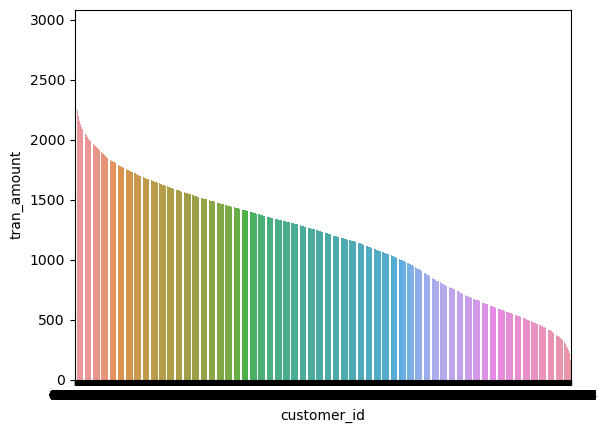

In [78]:
sns.barplot(x = 'customer_id', y = 'tran_amount',data = customer_amount)
plt.show()

In [42]:
#Time Series Analysis




import matplotlib.dates as mdates

In [43]:
df['month_year'] = df['trans_date'].dt.to_period('M')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1248\2940005999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('M')


In [44]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [45]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
type(monthly_sales.index)

pandas.core.indexes.period.PeriodIndex

In [46]:
monthly_sales.index = monthly_sales.index.to_timestamp()

In [47]:
type(monthly_sales.index)

pandas.core.indexes.datetimes.DatetimeIndex

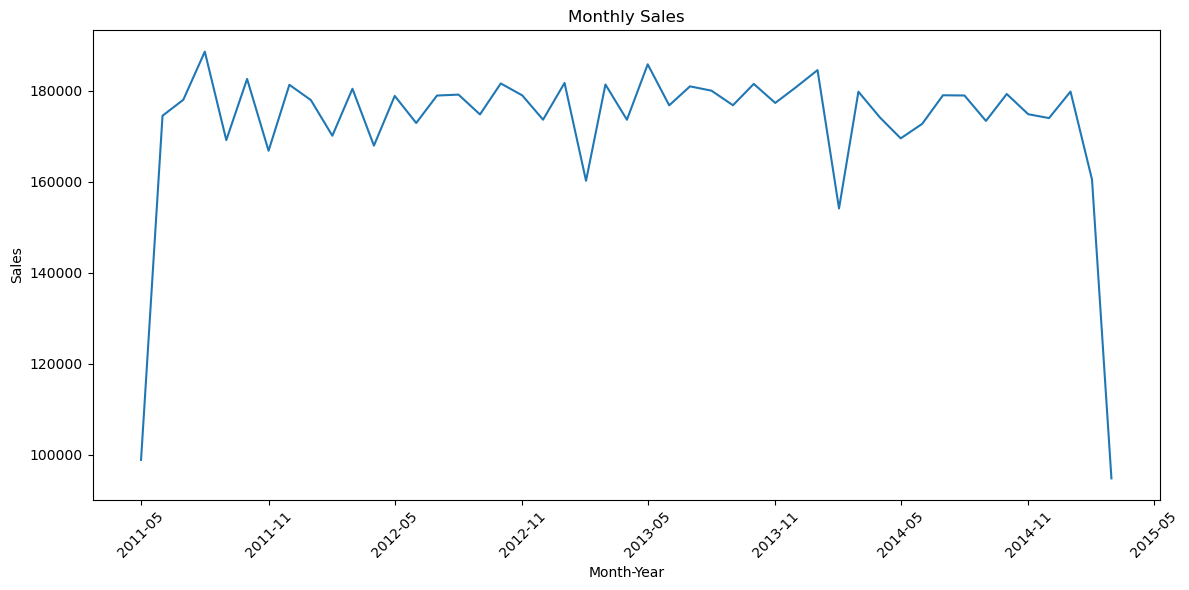

In [48]:
plt.figure(figsize = (12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [49]:
#Cohort segmentation


#Recency

recency = df.groupby("customer_id")['trans_date'].max()

#Frequency

frequency = df.groupby("customer_id")['trans_date'].count()

#Monetory

monetary = df.groupby("customer_id")['tran_amount'].sum()

In [50]:
rfm = pd.DataFrame({"recency":recency, "frequency": frequency, "monetary":monetary})

In [51]:
rfm 


,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [52]:
def segment_customers(row):
    if row['recency'].year>= 2012 and row['frequency']>=15 and row['monetary']>=1000:
        return 'PO';
    elif row['recency'].year>= 2011 and row['frequency']>=10 and row['monetary']>=500:
        return 'P1';
    else:
        return 'P2';
rfm['segment']= rfm.apply(segment_customers,axis= 1)

In [146]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,PO
CS1113,2015-02-09,20,1490,PO
CS1114,2015-02-12,19,1432,PO
CS1115,2015-03-05,22,1659,PO
CS1116,2014-08-25,13,857,P1
...,...,...,...,...
CS8996,2014-12-09,13,582,P1
CS8997,2014-06-28,14,543,P1
CS8998,2014-12-22,13,624,P1


<Axes: >

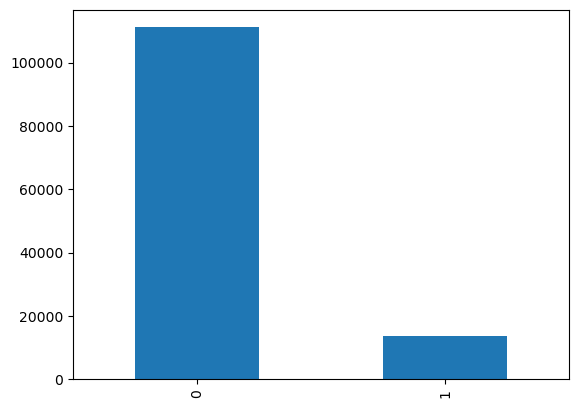

In [147]:
# count the number of churned and active members


churn_counts = df['response'].value_counts()
churn_counts.plot(kind = 'bar')

In [148]:
df.to_csv('MainData.csv')

In [149]:
rfm.to_csv('AdditionalAnaysis.csv')